In [2]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Ignoring Flask: markers 'python_version < "3.7"' don't match your environment
  Cloning https://github.com/achamberas/ds-utils.git to /private/var/folders/xr/smm2095x7txfhj4s2x6wzqyw0000gn/T/pip-req-build-x6hmy8b9
  Running command git clone -q https://github.com/achamberas/ds-utils.git /private/var/folders/xr/smm2095x7txfhj4s2x6wzqyw0000gn/T/pip-req-build-x6hmy8b9
  Resolved https://github.com/achamberas/ds-utils.git to commit 66333209880b88f3c9543cbecbc0052fdb6313d7
     |████████████████████████████████| 99 kB 6.8 MB/s eta 0:00:011
     |████████████████████████████████| 79 kB 21.6 MB/s eta 0:00:01
     |████████████████████████████████| 240 kB 36.5 MB/s eta 0:00:01
     |████████████████████████████████| 5.4 MB 20.5 MB/s eta 0:00:01
     |████████████████████████████████| 226 kB 52.1 MB/s eta 0:00:01
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
     |████████████████████████████████| 26.9 MB

In [25]:

import os
import pandas as pd
import pandas_gbq as pdgbq

from google.oauth2 import service_account
from google.cloud import bigquery

def bq_load(file):
    GOOGLE_APPLICATION_CREDENTIALS = 'creds/gristmill5-55f2eabbb537.json'
    project_id = 'gristmill5'
    table = 'data_lake.simulation'
    df = pd.read_csv(file)

    try:
        credentials = service_account.Credentials.from_service_account_file(GOOGLE_APPLICATION_CREDENTIALS)
        insert = pdgbq.to_gbq(df, table, project_id=project_id, if_exists='append', credentials=credentials)

        insert

    except Exception as e:
        print(e)
        print('error inserting data to BigQuery')


root = 'sample data/scraped data'

"""
for files in os.walk(root):
    for file in files[2]:
        f = root + '/' + file
        # bq_load(f)
        print(file)
"""


iterations = len([files[2] for files in os.fwalk(root)][0])

for i in range(0, iterations):
    fs = [files[2] for files in os.fwalk(root)][0]
    print(i, fs[i])


0 idf_run1_2009_5A_RetailStripmall_V2_S2_R1_per_idf_energy_csv_2009_5A_RetailStripmall_V2_S2_R1_105_energyscrape.csv
1 idf_run1_2009_5A_RetailStripmall_V2_S2_R1_per_idf_energy_csv_2009_5A_RetailStripmall_V2_S2_R1_101_energyscrape.csv
2 idf_run1_2009_5A_RetailStripmall_V2_S2_R1_per_idf_energy_csv_2009_5A_RetailStripmall_V2_S2_R1_104_energyscrape.csv
3 idf_run1_2009_5A_RetailStripmall_V2_S2_R1_per_idf_energy_csv_2009_5A_RetailStripmall_V2_S2_R1_100_energyscrape.csv
4 idf_run1_2009_5A_RetailStripmall_V2_S2_R1_per_idf_energy_csv_2009_5A_RetailStripmall_V2_S2_R1_103_energyscrape.csv
5 idf_run1_2009_5A_RetailStripmall_V2_S2_R1_per_idf_energy_csv_2009_5A_RetailStripmall_V2_S2_R1_102_energyscrape.csv


In [26]:
from pyngrok import ngrok

# [<NgrokTunnel: "https://<public_sub>.ngrok.io" -> "http://localhost:80">]
named_tunnel = ngrok.connect(name="some-edge-tunnel")
tunnels = ngrok.get_tunnels()
print(tunnels)
ngrok.disconnect(named_tunnel.public_url)
print(tunnels)

[]
[]


# Train Model

In [7]:
pip install /Users/anthonychamberas/Projects/services/utils

Defaulting to user installation because normal site-packages is not writeable
Processing /Users/anthonychamberas/Projects/services/utils
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for utils: filename=utils-0.1.0-py3-none-any.whl size=10199 sha256=e1b1552f945972b6d6e7a18a5a3ddcd8558868447f1a629150e2f0ea23f48cb3
  Stored in directory: /private/var/folders/xr/smm2095x7txfhj4s2x6wzqyw0000gn/T/pip-ephem-wheel-cache-xcqqp_mc/wheels/8e/52/59/d245051fac7bcf58160891bdff57a0af3ecaae9a34c6c7a589
Successfully built utils
  Attempting uninstall: utils
    Found existing installation: utils 0.1.0
    Uninstalling utils-0.1.0:
      Succe

## Prepare training data

In [1]:
import pandas as pd
import numpy as np
import copy

def combineDataset(data_path,
                   input_df_path_list, 
                   output_df_path_list,
                   climate_zones,
                   target_list):

    input_dfs = [pd.read_csv(data_path + input_path) for input_path in input_df_path_list]
    output_dfs = [pd.read_csv(data_path + output_path) for output_path in output_df_path_list]

    result_list = list()

    # Pairwisely preprocess input & output csv files
    for i in range(len(climate_zones)):
        # input_dfs[i]['climate_zone'] = climate_zones[i]

        output_dfs[i] = output_dfs[i].sort_values(by = "sample_id").rename(columns = {'sample_id': 'id'})

        target = output_dfs[i][['id', 'loc'] + [item for item in target_list]]

        result_list.append(pd.merge(input_dfs[i], target, on = "id", how = "inner"))

    final = pd.concat(result_list).reset_index(drop = True).drop(columns = ["id"])

    return final

def getCombinedFeatures(df1, toEnergyUsage = False, target_variables = []):
    """
    This function takes a DataFrame containing building parameters and calculates various building
    characteristics, such as combined floor area (CFA), volume (V), envelope surface area (ESA),
    aspect ratio (AR), total window-to-wall ratio (TWWR), and other relevant metrics. It returns a new
    DataFrame with these calculated metrics added as new columns.

    """

    df = copy.deepcopy(df1)

    LW = df.large_store_width
    SW = df.small_store_width
    D = df.building_depth
    FH = df.ground_floor_height
    DH = 2.13
    LDW = []
    SMD = []
    for i in range(df1.shape[0]):
        # Large Door Width
        if df.ground_floor_elevation_3_wwr[i] < 1.83*2.13*2 / (df.ground_floor_height[i] * df.large_store_width[i]):
            LDW.append(0.91)
        else: LDW.append(1.83)

        # Small Door Width
        if df.ground_floor_elevation_3_wwr[i] < 1.83*2.13 / (df.ground_floor_height[i] * df.small_store_width[i]):
            SMD.append(0.91)
        else: SMD.append(1.83)

    LDW = np.asarray(LDW)
    SDW = np.asarray(SMD)


    df["CFA"] = (2*LW*D) + (8*SW*D)
    df["V"] = df.CFA * FH
    df["OSA"] = (2*D*FH) + (2*FH*((8*SW)+(2*LW)))
    df["ESA"] = df.OSA + (D*((8*SW)+(2*LW)))
    df["ESA:V"] = df.ESA / df.V
    df["AR"] = D / ((2*LW) + (8*SW))
    df["TWWR"]= (FH*((8*SW)+(2*LW))*df.ground_floor_elevation_3_wwr) / df.OSA

    df['WA'] = (2*D*FH) + (FH*((8*SW)+(2*LW))) + ((FH*((8*SW) + (2*LW)))*(1- df.ground_floor_elevation_3_wwr))- ((LDW*DH *4) + (SDW*DH*8))
    df["LS:SS"] = (LW * 2) / (SW * 8)

    df["WWU"] = ((((LW*2) + (SW*8))*FH*df.ground_floor_elevation_3_wwr *df.elv3_window_u_value ) + (df.WA* (1/ df.ext_wall_rsi)) + (((LDW*DH*4) + (SDW*DH*8))*(1/ df.backdoor_rsi))) / df.OSA
    df["OWU"] = ((((LW*2)  + (SW*8))*FH* df.ground_floor_elevation_3_wwr * df.elv3_window_u_value) + (df.WA * (1/ df.ext_wall_rsi)) + (((LW*2)  + (SW*8))*D * (1/df.roof_rsi)) + (((LDW*DH*4) + (SDW*DH*8))*(1/ df.backdoor_rsi))) / df.ESA

    df["ODB"] = df.temp_setpoint_cooling_occupied - df.temp_setpoint_heating_occupied
    df["CD"] = df.temp_setpoint_cooling_setback + df.temp_setpoint_cooling_occupied
    df["HD"] = df.temp_setpoint_heating_occupied - df.temp_setpoint_heating_setback
    df["TLDB"] = df.ground_allowance_lpd + df.ground_lpd

    df["OD"] = ((df.large_max_occupant_density*2)+(df.small_max_occupant_density*8)) / df.CFA

    cols = list(df.columns.values)
    df = df[cols[cols.index("CFA"):] + cols[:cols.index("CFA")]]

    if toEnergyUsage:
      df.iloc[:, -2] = df.iloc[:, -2] * df.CFA
      df.iloc[:, -1] = df.iloc[:, -1] * df.CFA

    return df

<Axes: >

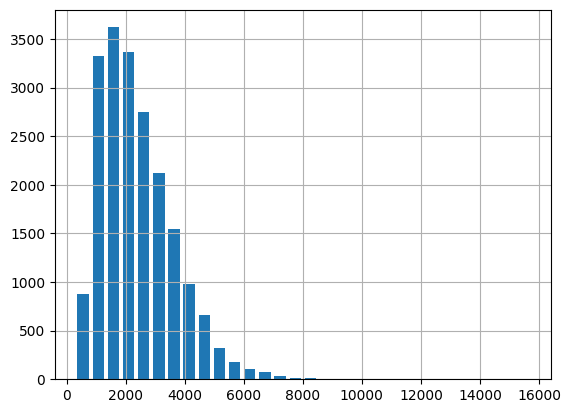

In [16]:
input_path = ['sample_data_samples_2009_5A_RetailStripmall_V1_S1.csv', 'sample_data_samples_2009_5B_RetailStripmall_V1_S1.csv','sample_data_samples_2009_5C_RetailStripmall_V1_S1.csv', 'sample_data_samples_2009_6A_RetailStripmall_V1_S1.csv', 'sample_data_samples_2009_6B_RetailStripmall_V1_S1.csv']
output_path = ["idf_run1_2009_5A_RetailStripmall_V1_S1_R1_energyscrape.csv", "idf_run1_2009_5B_RetailStripmall_V1_S1_R1_energyscrape.csv", "idf_run1_2009_5C_RetailStripmall_V1_S1_R1_energyscrape.csv","idf_run1_2009_6A_RetailStripmall_V1_S1_R1_energyscrape.csv", "idf_run1_2009_6B_RetailStripmall_V1_S1_R1_energyscrape.csv"]
climate_zones = ['5A', '5B', '5C', '6A', '6B']
target_list = ['total_eui_elec_gj_m2', 'total_eui_ng_gj_m2']
data_path = 'sample data/training data/'

df = combineDataset(data_path, input_path, output_path, climate_zones, target_list)
df = getCombinedFeatures(df, toEnergyUsage = True)

df['total_eui_elec_gj_m2_ln'] = np.log2(df['total_eui_elec_gj_m2'])
df['total_eui_elec_gj_m2'].hist(bins=30, rwidth=0.75)

Feature Set:    Combined Model
Minority Pct:   0.5


----------------------------------------------------------------------------
--------------------- Combined Model: minority pct=0.5 ---------------------
----------------------------------------------------------------------------
Model Performance with Transformation 
Mean Squared Error (MSE): 209871.50
Root Mean Squared Error (RMSE): 458.12
Mean Absolute Percentage Error (MAPE): 13.66
Weighted Absolute Percentage Error (WAPE): 12.23
Average Error: 293.9350 degrees.
Transformation Bias: -2.34%.
Accuracy = 87.77%.



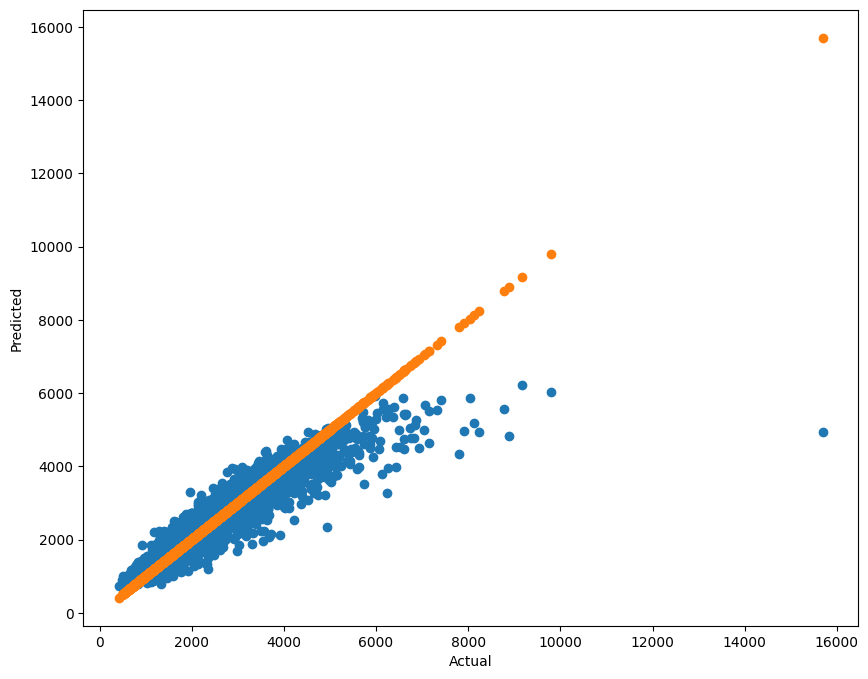

In [17]:
from utils.train import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report

# import mlflow

# mlflow.set_tracking_uri("http://localhost:5000")

# specify the name of the target column in the data frame
target = 'total_eui_elec_gj_m2'
transform = ''

# set values for minority percentages to balance dataset in training expirements.
minority_pcts = [0.5]

# set various feature sets to test across training expirements.
drop_cols = ['ESA', 'AR', 'HD', 'ahu_burner_efficiency', 'supply_air_temp_heating', 'temp_setpoint_heating_occupied', 'temp_setpoint_heating_setback', 'total_eui_ng_gj_m2', 'total_eui_elec_gj_m2', 'total_eui_elec_gj_m2_ln']
cols = df.columns
features = list(set(cols) - set(drop_cols))

feature_sets = {
    'Combined Model': {
        'features':features
    }
}

models = []

# iterate through model scenarios
for mp in minority_pcts:
    for fs in feature_sets:
        # balance dataset, save to new data frame and flag records in original as sampled
        # df3, df_reg = balance_dataset(df3, target, 1, mp)
        df_reg = df.copy()

        # split dataset into training and testing
        X_train, X_test, y_train, y_test, feature_info = split_dataset(df_reg, feature_sets[fs]['features'], target)

        """
        # balance just training data

        print('train before balance')
        df_train = pd.merge(X_train, y_train, how='left', left_index=True, right_index=True)

        df_train, df_train_bal = balance_dataset(df_train, target, 1, mp)

        X_train = df_train_bal.loc[:, df_train_bal.columns != target]
        y_train = df_train_bal[target]

        print('training dataset counts')
        print(y_train.value_counts())

        print('testing dataset counts')
        print(y_test.value_counts())
        """

        # with mlflow.start_run() as model_tracking_run:

        title = fs + ': minority pct=' + str(mp)
        description = 'minority %: ' + str(mp) + '\nthreshold prob: ' + '\nfeatures:\n....' + '\n....'.join(feature_sets[fs]['features'])

        #mlflow.autolog()  # Or other tracking functions
        #mlflow.set_tag("mlflow.runName", title)
        #mlflow.set_tag("mlflow.note.content", description)

        # set hyperparameters
        model = RandomForestRegressor(
            bootstrap=False,
            max_depth=20,
            max_features='sqrt',
            min_samples_leaf=2,
            min_samples_split=10,
            n_estimators=80
        )

        # fit model to training data for current expirement
        model.fit(X_train, y_train)
        model.set_params()

        # Evaluate Model
        metrics, importances_df, y_pred = evaluate(model, X_test, y_test, transform=transform, title=title)

        models.append({"model":model, "X_test":X_test, "y_test":y_test, "y_pred":y_pred})

        # set test metrics in ML Flow expirement
        #mlflow.log_metric("test_accuracy", metrics['accuracy'])
        #mlflow.log_metric("test_precision", metrics['precision_score'])
        #mlflow.log_metric("test_recall", metrics['recall_score'])
        #mlflow.log_metric("test_roc_auc", metrics['roc_auc_score'])
        #mlflow.log_metric("test_f1_score", metrics['f1_score'])
        #mlflow.log_figure(metrics['pred_hist_chart'], 'pred_hist_chart.png')

In [18]:
# save model
save_model(model, X_test, y_test, feature_info, model_type='regression', filename='total_eui_elec_gj_m2', period_label=None)

'saved and uploaded'

# Error Analysis

## Sample Plan
https://docs.google.com/spreadsheets/d/120glSDNi1COUMeu-B9KnbfzSkzKM7syY/edit?usp=sharing&ouid=103559666706832096026&rtpof=true&sd=true

## Error Analysis
https://docs.google.com/spreadsheets/d/18IqPK4H9RoaX-aohsHqFegzqfQcKOjWkRWE_L_IG30I/edit?usp=sharing

<Axes: >

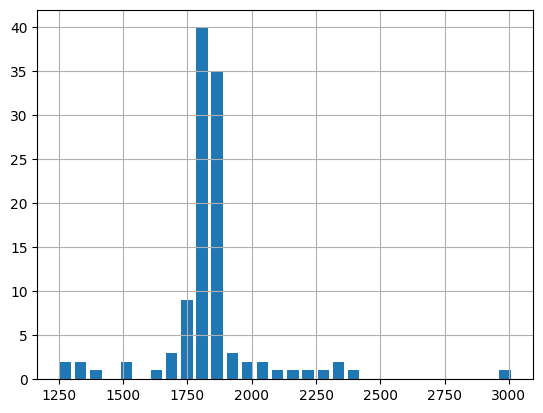

In [20]:
input_path = ['input_data.csv']
output_path = ['energyscrape.csv']
climate_zones = ['6A']
target_list = ['total_eui_elec_gj_m2', 'total_eui_ng_gj_m2']
data_path = 'sample data/error analysis/'

df = combineDataset(data_path, input_path, output_path, climate_zones, target_list)
df = getCombinedFeatures(df, toEnergyUsage = True)

df['total_eui_elec_gj_m2_ln'] = np.log2(df['total_eui_elec_gj_m2'])

df['total_eui_elec_gj_m2'].hist(bins=30, rwidth=0.75)

/Users/anthonychamberas/Library/Python/3.9/lib/python/site-packages/utils/predict.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'prediction'] = model.predict(X)


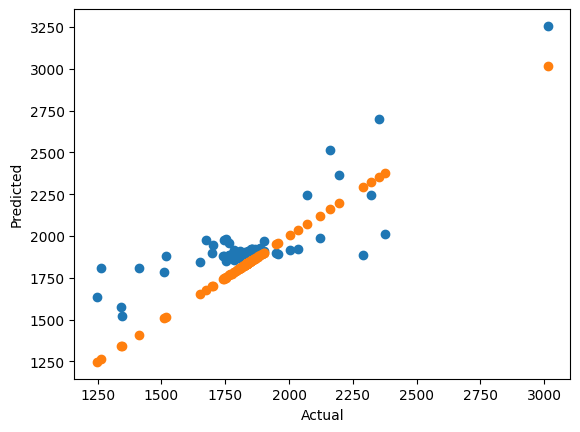

In [21]:
from utils.predict import *
import matplotlib.pyplot as plt

# set various feature sets to test across training expirements.
drop_cols = ['New Input','Difference', 'Edited Parameter', 'For Lookup','Baseline Value', 'Percent Difference', 'Parameter Category', 'ESA', 'AR', 'HD', 'ahu_burner_efficiency', 'supply_air_temp_heating', 'temp_setpoint_heating_occupied', 'temp_setpoint_heating_setback', 'total_eui_ng_gj_m2']
cols = df.columns
features = list(set(cols) - set(drop_cols))
model = 'total_eui_elec_gj_m2'
target = 'total_eui_elec_gj_m2'

data = df[features]

results = predict(data, model, False)
results[[target, 'prediction']]

y_test = results[target]
y_pred = results['prediction']

plt.scatter(y_test, y_pred)
plt.scatter(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
